### Step1. [Understand Data]. Using Pandas, import “train_loan.csv” file and print properties such as head,shape,columns,dtype,info and value_counts.

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train_loan.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [5]:
train.shape

(614, 13)

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
train.value_counts

<bound method DataFrame.value_counts of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849  

### Step2. [Data Cleaning]

In [10]:
def to_str(x):
    if x == '0':
        return 'bad'
    elif x == '1':
        return 'average'
    elif x == '2':
        return 'good'
    else:
        return 'excellent'

In [11]:
train['Dependents'] = train['Dependents'].apply(to_str)

In [12]:
train.Dependents.value_counts()

bad          345
average      102
good         101
excellent     66
Name: Dependents, dtype: int64

In [13]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Education']=train['Education'].fillna(train['Education'].mode()[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mode()[0])
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].median())

In [15]:
train=train.drop(['Loan_ID'],axis=1)

### Step2. [Data Cleaning]

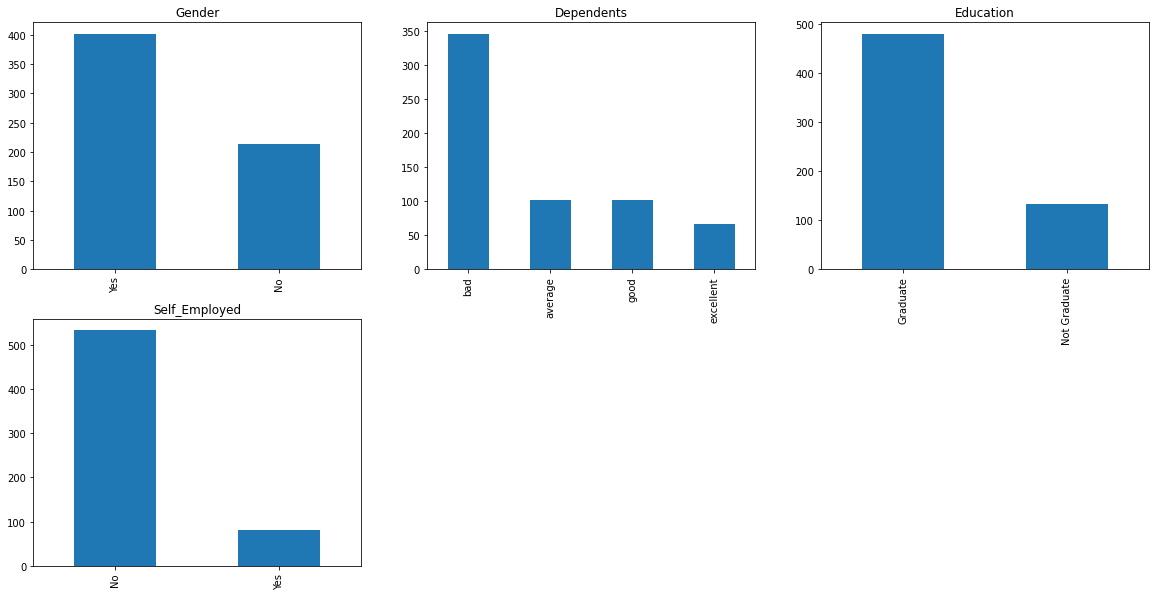

In [16]:
plt.subplot(231)
train['Married'].value_counts().plot(kind='bar',title='Gender',figsize = (20,10))

plt.subplot(232)
train['Dependents'].value_counts().plot(kind='bar',title='Dependents')

plt.subplot(233)
train['Education'].value_counts().plot(kind='bar',title='Education')

plt.subplot(234)
train['Self_Employed'].value_counts().plot(kind='bar',title='Self_Employed')

plt.show()

### Step4. [Extract X and y] from the dataframe

In [17]:
X = train.drop(['Loan_Status'],axis=1)

In [18]:
y = train.Loan_Status

### Step5. [One Hot Encoding]

In [19]:
X = pd.get_dummies(X)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve,precision_score,recall_score

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [23]:
ss = scale.fit_transform(X_train)
ss1 = scale.transform(X_test)

In [24]:
model = LinearSVC()
model.fit(ss,y_train)

LinearSVC()

In [25]:
lsvc_y_pred = model.predict(ss1) 
lsvc_y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [26]:
accuracy_score(y_test,lsvc_y_pred)

0.8324324324324325

In [27]:
confusion_matrix(y_test,lsvc_y_pred)

array([[ 22,  29],
       [  2, 132]], dtype=int64)

In [28]:
print(classification_report(y_test,lsvc_y_pred))

              precision    recall  f1-score   support

           N       0.92      0.43      0.59        51
           Y       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



### Step7. [Performance Comparisons]

In [29]:
model1= LogisticRegression()
model1.fit(ss,y_train)

lr_y_pred = model1.predict(ss1) 

print("LogisticRegression:    ",accuracy_score(y_test,lr_y_pred))

LogisticRegression:     0.8324324324324325


In [30]:
model2 = SGDClassifier()
model2.fit(ss,y_train)

sgdc_y_pred = model2.predict(ss1) 

print("SGDClassifier:  ", accuracy_score(y_test,sgdc_y_pred))

SGDClassifier:   0.6378378378378379


In [31]:
model3 = svm.SVC(kernel='poly', C = 1.0)

model3.fit(ss,y_train)

psvc_y_pred=model3.predict(ss1)

print("poly SVC:  ",accuracy_score(y_test,psvc_y_pred))

poly SVC:   0.8162162162162162


In [32]:
model4 = svm.SVC(kernel='rbf', C = 1.0)

model4.fit(ss,y_train)

rbfsvc_y_pred=model4.predict(ss1)

print("rbf SVC:  ",accuracy_score(y_test,rbfsvc_y_pred))

rbf SVC:   0.8324324324324325


In [33]:
model5 = svm.SVC(kernel='sigmoid', C = 1.0)

model5.fit(ss,y_train)

sigsvc_y_pred=model5.predict(ss1)

print("Sigmoid SVC:  ",accuracy_score(y_test,sigsvc_y_pred))

Sigmoid SVC:   0.8


In [34]:
MLA  = [model,model1,model2,model3,model4,model5 ]

In [35]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(ss, y_train).predict(ss1)
    predicted=np.where(predicted=='Y',1,0)
    y_testb=np.where(y_test=='Y',1,0)
    fp, tp, th = roc_curve(y_testb, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(ss,y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(ss1,y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_testb, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_testb, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    row_index+=1
    
MLA_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,LinearSVC,0.8042,0.8324,0.819876,0.985075,0.708224
1,LogisticRegression,0.8042,0.8324,0.819876,0.985075,0.708224
2,SGDClassifier,0.7179,0.7297,0.823077,0.798507,0.673764
3,SVC,0.8345,0.8162,0.820513,0.955224,0.703102
4,SVC,0.8135,0.8324,0.819876,0.985075,0.708224
5,SVC,0.7296,0.8000,0.821192,0.925373,0.697981


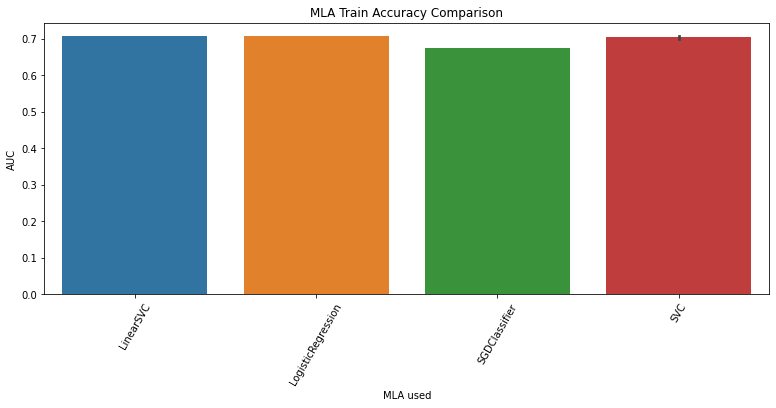

In [42]:
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="AUC",data=MLA_compare)
plt.xticks(rotation=60)
plt.title('MLA Train Accuracy Comparison')
plt.show()